# SENTIMENT_ANALYSIS_API_USING_FASTAPI

## INTRODUCTION

### Machine learning models can be consumed as restful APIs. Mostly, the real use of your ML model lies at the heart of an intelligent product – that may be a small component of a recommender system or an intelligent chat-bot. These seem very difficult to overcome as the majority of ML practitioners use R/Python for their experiments whilst consumers of those ML models would be software engineers who use a completely different technology stack.

### This problem can be easily solved with building of APIs. Web APIs have made it easy for cross-language applications to work well. If a frontend developer needs to use your ML Model to create an ML powered web application, they would just need to get the URL Endpoint from where the API is being served. 

### In this project, we will build an ML model, create a restful API for the model and finally containerized the application with Docker.


## METHODOLOGY

### CRISP-DM framework will be used to carried out this project as it is the standard proceedures for Machine learning and Data Analysis projects. It involes the following steps:

### Understanding the project (Business understanding)

### Understanding the datasets 

### Model building

### Evaluation of the Model 

### Deployment of the Model.



## DATA UNDERSTANDING

### EXPLORATORY DATA ANALYSIS (EDA)

Data exploration techniques include both manual analysis and automated data exploration software solutions that visually explore and identify relationships between different data variables, the structure of the dataset, the presence of outliers, and the distribution of data values in order to reveal patterns and points of interest, enabling data analysts to gain greater insight into the raw data.

Data is often gathered in large, unstructured volumes from various sources and data analysts must first understand and develop a comprehensive view of the data before extracting relevant data for further analysis, such as univariate, bivariate, multivariate, and principal components analysis



## HYPOTHESIS STATEMENT

### 1) NUL HYPOTHESIS: INSURANCE IS NOT DEPENDENT ON THE PATIENT AGE.

### 2)ALTERNATE HYPOTHESIS: INSURANCE IS DEPENDENT ON THE PATIENT AGE.





## ANALYTICAL QUESTIONS

### 1. WHAT IS THE TOTAL NUMBER OF PATIENTS THAT HOLDS INSURANCE

### 2. WHICH PATIENT AGE WITH THE HIGHEST BLOOD PRESSURE LEVEL.

### 3.  HOW MANY PATIENTS HAS POSITIVE SEPSSIS.

### 4. HOW MANY HAS NEGATIVE SEPSSIS

### 5. WHICH AGE HAS THE HIGHEST BODY MASS INDEX

.



## LOADING RELEVANT LIBRARIES

In [1]:
# installing FastAPI

#!pip install --only-binary :all: fastapi[all]

#!pip install scikit-learn
#!pip install imbalanced-learn

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fastapi import FastAPI

# hypothesis testing tool
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

#pipelines and transformers 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import make_pipeline

#handling imbalance datasets
#from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

#Algorithms libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Encoding & preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import os
import pickle

import warnings 
warnings.filterwarnings('ignore')


## LOADING THE DATASETS

In [3]:
train_df = pd.read_csv(r"C:\Users\USER\Desktop\Azubi\Sentiment Analysis API using FastAPI\Dataset\train.csv")

train_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


### COLUMNS DESCRIPTION
#### ID: number to represent patient ID
#### PRG: Plasma glucose
#### PL: Blood Work Result-1 (mu U/ml)
#### PR: Blood Pressure (mm Hg)
#### SK: Blood Work Result-2 (mm)
#### TS: Blood Work Result-3 (mu U/ml)
#### M11: Body mass index (weight in kg/(height in m)^2
#### BD2: Blood Work Result-4 (mu U/ml)
#### Age: patients age (years)
#### Insurance: If a patient holds a valid insurance card
#### Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwis

In [4]:
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [6]:
train_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
train_df.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

### UNIVARIATE ANALYSIS

Univariate Analysis is a type of data visualization where we visualize only a single variable at a time. Univariate Analysis helps us to analyze the distribution of the variable present in the data so that we can perform further analysis.

In [8]:
# Analysis of the Sepssis Column

train_df['Sepssis'].value_counts()

Negative    391
Positive    208
Name: Sepssis, dtype: int64

<Axes: xlabel='Sepssis', ylabel='count'>

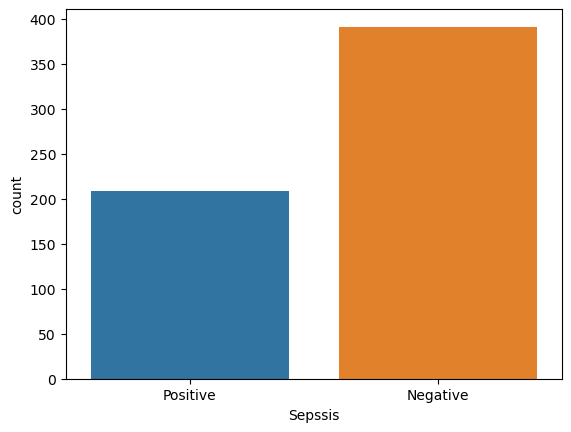

In [9]:
# Visualizing the Sepssis Count

sns.countplot(x=train_df['Sepssis'])

In [10]:
# Analysis of the Insurance Column

train_df['Insurance'].value_counts()

1    411
0    188
Name: Insurance, dtype: int64

<Axes: xlabel='Insurance', ylabel='count'>

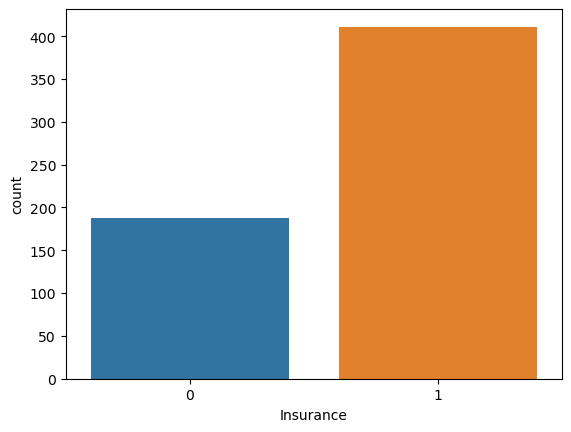

In [11]:
# Visualizing the Insurance Count

sns.countplot(x=train_df['Insurance'])

In [12]:
train_df['Age'].value_counts()

22    52
21    52
25    40
24    37
23    27
29    27
28    26
26    25
27    21
41    20
31    19
37    18
30    16
33    15
42    13
32    13
36    13
38    13
46    11
35    10
39    10
34     9
45     8
40     8
43     8
51     7
58     7
44     7
52     5
60     5
57     5
47     4
62     4
55     4
50     4
54     4
48     3
59     3
65     3
53     3
66     3
49     3
63     3
67     3
61     2
56     2
69     1
72     1
81     1
64     1
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

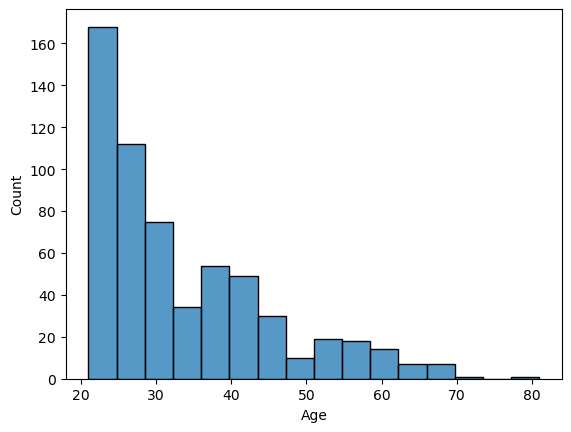

In [13]:
sns.histplot(train_df['Age'])

<Axes: >

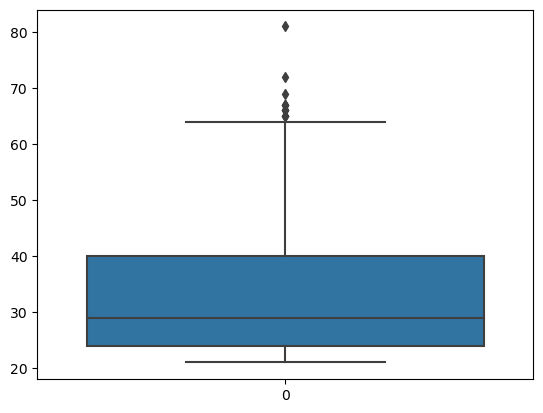

In [14]:
sns.boxplot(train_df['Age'])

From the above graph, it shows that dataset is imbalance. It is not even as those patients with insurance are high and the positive sepssis is also high.

## BIVARIATE ANALYSIS

Bivariate analysis is the simultaneous analysis of two variables. It explores the concept of the relationship between two variable whether there exists an association and the strength of this association or whether there are differences between two variables and the significance of these differences.

### The main three types we will see here are:

### Categorical v/s Numerical 

### Numerical V/s Numerical

### Categorical V/s Categorical data

(array([0, 1]), [Text(0, 0, 'Positive'), Text(1, 0, 'Negative')])

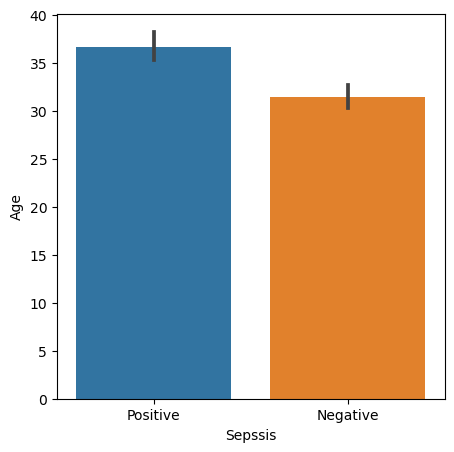

In [15]:
plt.figure(figsize=(5, 5))
sns.barplot(x=train_df['Sepssis'], y=train_df['Age'])
plt.xticks(rotation='horizontal')

## NUMERICAL VS NUMERICAL COLUMN

<Axes: xlabel='BD2', ylabel='Age'>

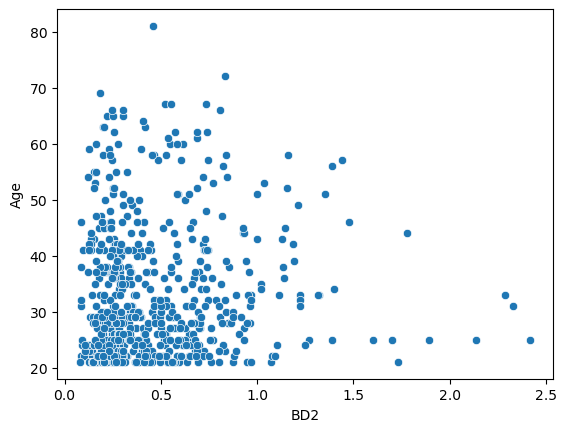

In [16]:
# Age vs Body Mass index (BD2)

sns.scatterplot(x=train_df['BD2'],
                y=train_df['Age'])

## MULTIVARIATE ANALYSIS

It is an extension of bivariate analysis which means it involves multiple variables at the same time to find correlation between them. Multivariate Analysis is a set of statistical model that examine patterns in multidimensional data by considering at once, several data variable.

<Axes: >

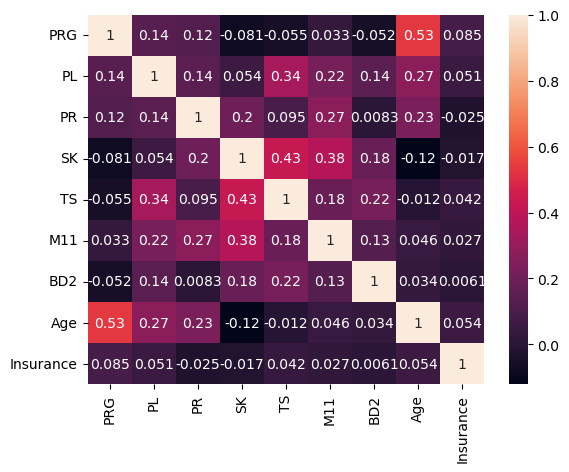

In [17]:
# CORROLETION

sns.heatmap(train_df.corr(), annot=True)

## HYPOTHESIS TESTING

### 1) NUL HYPOTHESIS: INSURANCE IS NOT DEPENDENT ON THE PATIENT AGE.

### 2)ALTERNATE HYPOTHESIS: INSURANCE IS DEPENDENT ON THE PATIENT AGE.


### STATISTICAL TESTING

### KPSS TEST

In [18]:
# Significant Value - 5%

stats,p,lags,critical_values = kpss(train_df['Insurance'], 'ct')
print(f'Test_Statistics: {stats}')
print(f'P-Value:{p}')
print(f'Critical Values:{critical_values}')

if p < 0.05:
    print('Insurance is not Dependent on the Patient Age')
else:
    print('Insurance is Dependent on the Patient Age')

Test_Statistics: 0.018561648238904657
P-Value:0.1
Critical Values:{'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Insurance is Dependent on the Patient Age


## from the test above, the Insurance is dependent on the Patient Age.

## ANALYTICAL QUESTIONS
1. WHAT IS THE TOTAL NUMBER OF PATIENTS THAT HOLDS INSURANCE

2. WHICH PATIENT AGE WITH THE HIGHEST BLOOD PRESSURE LEVEL.

3. HOW MANY PATIENTS HAS POSITIVE SEPSSIS.

4. HOW MANY HAS NEGATIVE SEPSSIS.

5. WHICH AGE HAS THE HIGHEST BODY MASS INDEX

### 1. WHAT IS THE TOTAL NUMBER OF PATIENTS THAT HOLDS INSURANCE

In [19]:
# What is the Total number of patients that holds insurance

train_df['Insurance'].value_counts()

1    411
0    188
Name: Insurance, dtype: int64

<Axes: xlabel='Insurance', ylabel='count'>

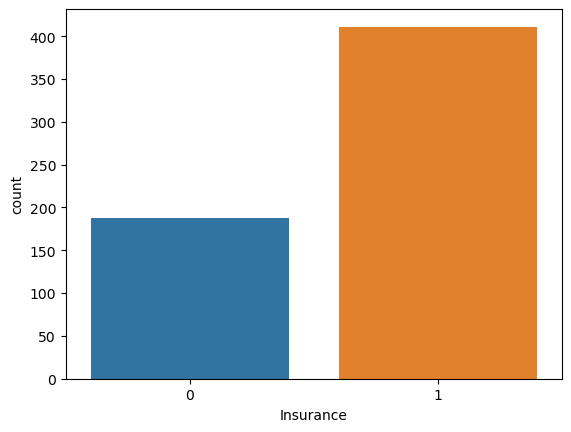

In [20]:
# Visualizing the Insurance Count

sns.countplot(x=train_df['Insurance'])

The total Patients with Insurance is 411

### 2. WHICH PATIENT AGE WITH THE HIGHEST BLOOD PRESSURE LEVEL

In [21]:
# Getting the Age by the Blood Pressure Level

pd.set_option('display.float_format', lambda x: '%.3f' % x)
type_aggregate = train_df.groupby(['Age'])['PR'].mean().sort_values(ascending=False).reset_index()
type_aggregate.head()

,Age,PR
0,54,93.500
1,49,87.000
2,66,84.000
3,52,83.200
4,50,82.000


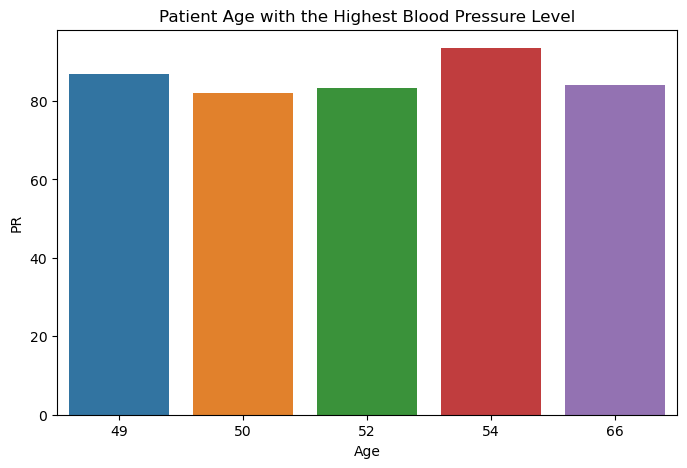

In [22]:
# Visiualizing the total Age by PR

plt.figure(figsize=(8,5))
sns.barplot(x='Age', y='PR', data=type_aggregate.head())
plt.title('Patient Age with the Highest Blood Pressure Level')
plt.show()

The Patient Age with the highest Blood Pressure level is 54, blood Pressure = 93.500

### 3. HOW MANY PATIENTS HAS POSITIVE SEPSSIS.

In [23]:
train_df['Sepssis'].value_counts()

Negative    391
Positive    208
Name: Sepssis, dtype: int64

<Axes: xlabel='Sepssis', ylabel='count'>

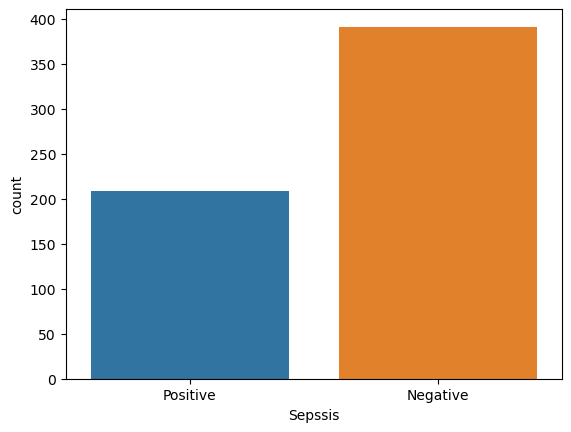

In [24]:
# Visualizing the Sepssis Count for Positive

sns.countplot(x=train_df['Sepssis'])

The patients with Positive Sepssis is 208

### 4. HOW MANY HAS NEGATIVE SEPSSIS.

In [25]:
train_df['Sepssis'].value_counts()

Negative    391
Positive    208
Name: Sepssis, dtype: int64

<Axes: xlabel='Sepssis', ylabel='count'>

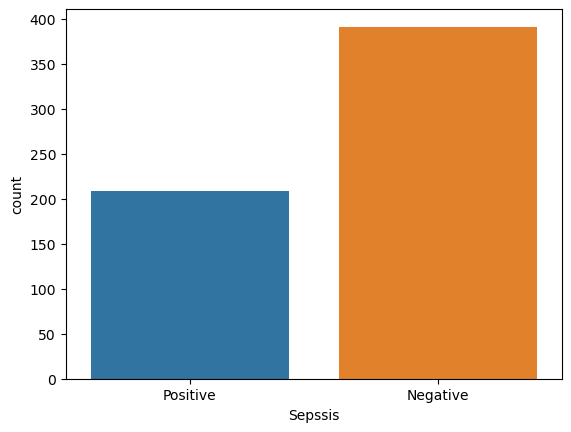

In [26]:
# Visualizing the Sepssis Count for Negative

sns.countplot(x=train_df['Sepssis'])

Patients with Negative Sepssis is 391

### 5. WHICH AGE HAS THE HIGHEST BODY MASS INDEX

In [27]:
# Getting the Age by the Body Mass Index

pd.set_option('display.float_format', lambda x: '%.3f' % x)
type_aggregate2 = train_df.groupby(['Age'])['M11'].mean().sort_values(ascending=False).reset_index()
type_aggregate2.head()

,Age,M11
0,43,36.888
1,56,36.000
2,45,35.925
3,42,35.500
4,47,35.450


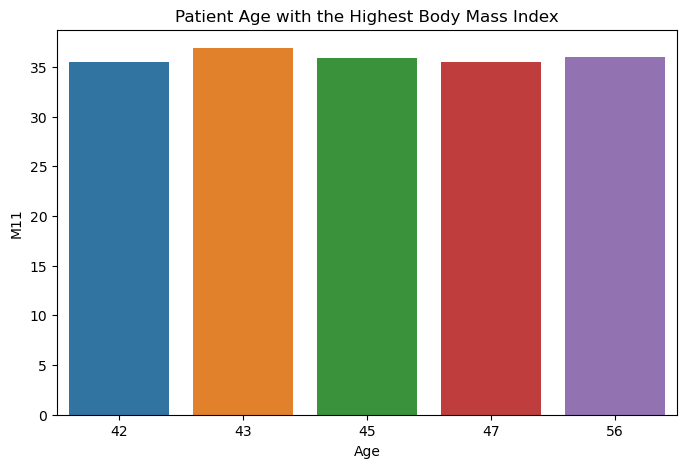

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x='Age', y='M11', data=type_aggregate2.head())
plt.title('Patient Age with the Highest Body Mass Index')
plt.show()

Age with the highest Body Mass Index is 43

## CHECKING DATA IMBALANCE

### CLASS FRQUENCY USING VALUE_COUNTS AND FINDING CLASS DISTRIBUTION RATIO

In [29]:
# Using the Sepssis column to check for imbalance

train_df['Sepssis'].value_counts()
positive = len(train_df[train_df['Sepssis'] == 'Positive'])
negative = len(train_df[train_df['Sepssis'] == 'Negative'])

class_distribution_ratio = negative/positive

class_distribution_ratio


1.8798076923076923

In [30]:
positive, negative

(208, 391)

## FEATURE ENIGEENRING

In [31]:
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.600,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.600,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.300,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.100,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.100,2.288,33,1,Positive


In [32]:
# Remove the ID column as it is not necesary

train_data = train_df.drop(columns='ID', axis=1)


In [33]:
# Renaming the PRG to BD2 columns names

train_data = train_data.rename(columns = {'PRG': 'Plasma Glucose level', 'PL': '1st Blood Work Result', 
                                          'PR': 'Blood Pressure Level', 'SK':'2nd Blood Work Result', 
                                          'TS': '3rd Blood work Result', 'M11':'Body Mass Index', 'BD2':'4th Blod Work Result'})

In [34]:
# Replace the Positive and Negative in Sepssis Column

train_data['Sepssis'].replace({'Positive': 1, 'Negative': 0}, inplace=True)

In [35]:
train_data

,Plasma Glucose level,1st Blood Work Result,Blood Pressure Level,2nd Blood Work Result,3rd Blood work Result,Body Mass Index,4th Blod Work Result,Age,Insurance,Sepssis
0,6,148,72,35,0,33.600,0.627,50,0,1
1,1,85,66,29,0,26.600,0.351,31,0,0
2,8,183,64,0,0,23.300,0.672,32,1,1
3,1,89,66,23,94,28.100,0.167,21,1,0
4,0,137,40,35,168,43.100,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.600,0.733,34,0,0
595,0,188,82,14,185,32.000,0.682,22,1,1
596,0,67,76,0,0,45.300,0.194,46,1,0
597,1,89,24,19,25,27.800,0.559,21,0,0


In [36]:
train_data.isna().sum()

Plasma Glucose level     0
1st Blood Work Result    0
Blood Pressure Level     0
2nd Blood Work Result    0
3rd Blood work Result    0
Body Mass Index          0
4th Blod Work Result     0
Age                      0
Insurance                0
Sepssis                  0
dtype: int64

In [37]:
# Remove all NaN values in any rows
train_data = train_data[~train_data.isna().any(axis=1)]

# DATA SPLITTING

In [38]:
# select independent variables

x = train_data.drop(columns='Sepssis')


# select target variables

y = train_data.loc[:, 'Sepssis']

# prove that the variables were selected correctly

print(x.columns)


Index(['Plasma Glucose level', '1st Blood Work Result', 'Blood Pressure Level',
       '2nd Blood Work Result', '3rd Blood work Result', 'Body Mass Index',
       '4th Blod Work Result', 'Age', 'Insurance'],
      dtype='object')


In [39]:
# prove that the variables were selected correctly

print(y.name)

Sepssis


In [40]:
# Seperating the train dataset into numerical and categorical variables

num_cols = x.select_dtypes(exclude='object').columns

cat_cols = x.select_dtypes(include='object').columns

In [41]:

# APPLYING TRAIN_TEST

x_train,x_eval,y_train,y_eval = train_test_split(x, y,test_size=0.20,random_state=34, stratify = y)

print('Shape of x_train and y_train: ',x_train.shape, y_train.shape)

print('Shape of x_eval and y_eval: ',x_eval.shape, y_eval.shape)

Shape of x_train and y_train:  (479, 9) (479,)
Shape of x_eval and y_eval:  (120, 9) (120,)


## NORMALIZING AND ENCODING OUR DATASET

In [42]:
# Applying OrdinalEnconder() for categorical binary variables and  StandardScaler() for numerical variables to scale it


cat_encoder = OrdinalEncoder()

num_scaler = StandardScaler()

# Apply SimpleImputer

num_imputer = SimpleImputer(strategy = 'median').set_output(transform = 'pandas')

cat_imputer = SimpleImputer(strategy = 'most_frequent').set_output(transform = 'pandas')

In [43]:
# Feature pipeline

num_pipe = Pipeline(steps = [('num_imputer', num_imputer), ('scaler', num_scaler)])

cat_pipe = Pipeline(steps = [('cat_imputer', cat_imputer), ('encoder', cat_encoder)])


In [44]:
# End2End_pipeline Features preprocessor 

preprocessor = ColumnTransformer([("StandardScaler", num_pipe, num_cols),
                                  ("OrdinalEncoder", cat_pipe, cat_cols),])
preprocessor.set_output(transform='pandas')

ColumnTransformer(transformers=[('StandardScaler',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Plasma Glucose level', '1st Blood Work Result', 'Blood Pressure Level',
       '2nd Blood Work Result', '3rd Blood work Result', 'Body Mass Index',
       '4th Blod Work Result', 'Age', 'Insurance'],
      dtype='object')),
                                ('OrdinalEncoder',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index([], dtype='object'))])

In [45]:
# end2end Pipeline

clf_ = Pipeline([('preprocessor',preprocessor), ('model', None)]).set_output(transform = 'pandas')


# MODELING

### WE SHALL BE TRAINING OF THE FOLLOWING MODELS:

#### 1) Logistic Regression.

#### 2) Decision Trees.

#### 4) Random Forest.

### OUR PERFORMANCE METRICS SHALL BE F1_SCORE

In [46]:
#Declaring our Performance metric

metric = f1_score

# CREATE TRAINED MODELS LIST

models_trained = []

# LogisticRegression Model

In [47]:
LR = Pipeline([('preprocessor',preprocessor), ('model', LogisticRegression(random_state=42))]).set_output(transform = 'pandas')

In [48]:
LR.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Plasma Glucose level', '1st Blood Work Result', 'Blood Pressure Level',
       '2nd Blood Work Result', '3rd Blood work Result', 'Body Mass Index',
       '4th Blod Work Result', 'Age', 'Insurance'],
      dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index([], dtype='object'))])),
                ('model', LogisticRegression(random_state=42))])

In [49]:
models_trained.append(LR)

In [52]:
# MODEL EVALUATION USING THE EVALSET DATASET

y_eval_pred_LR = LR.predict(x_eval)

In [54]:
# Calculation the f1_score performance metric on Logistic Regression

f1_LR = f1_score(y_eval, y_eval_pred_LR)

print(f'Logistic Regression Model F1_Score is: {f1_LR}')

Logistic Regression Model F1_Score is: 0.6500000000000001


In [57]:
print(classification_report(y_eval, y_eval_pred_LR))


              precision    recall  f1-score   support

           0       0.80      0.85      0.83        78
           1       0.68      0.62      0.65        42

    accuracy                           0.77       120
   macro avg       0.74      0.73      0.74       120
weighted avg       0.76      0.77      0.76       120

